In [245]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from browser import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
TUNABLE = ['m_groups', 'k_winners', 'eps', 'boost_strength', 'fpartition', 'forget_mu', 'dropout_p']

In [247]:
exps = [
    'Flat_PTB_Explore',
    'Flat_PTB_Snipe'
]

paths = [os.path.expanduser("~/s3_jgordon/ray/results/{}".format(e)) for e in exps]
df = load_many(paths)

Loaded 23 experiments


In [248]:
df.loc[~df.k_winners_pct.isnull(), 'k_winners'] = df.k_winners_pct * df.m_groups
df.k_winners = df.k_winners.astype(int)

for tp in TUNABLE:
    if tp not in df:
        df[tp] = None
        
df.fillna(value={
    'forget_mu': 0.0,
    'dropout_p': 0.0
}, inplace=True)


In [249]:
def scatter_all_tunable(df, params=TUNABLE, ppl_cutoff=220):
    fig, axs = plt.subplots(len(params), 1, figsize=(8, 14), 
                            dpi=144, 
                            gridspec_kw={'hspace': 0.7})
    for ax, p in zip(axs, params):
        df[df.val_pred_ppl_min <= ppl_cutoff].plot(kind='scatter', x=p, y='val_pred_ppl_min', c='train_pred_ppl_min', colormap='viridis', ax=ax)
        ax.set_title("%s vs min val PPL" % p)
    plt.show()

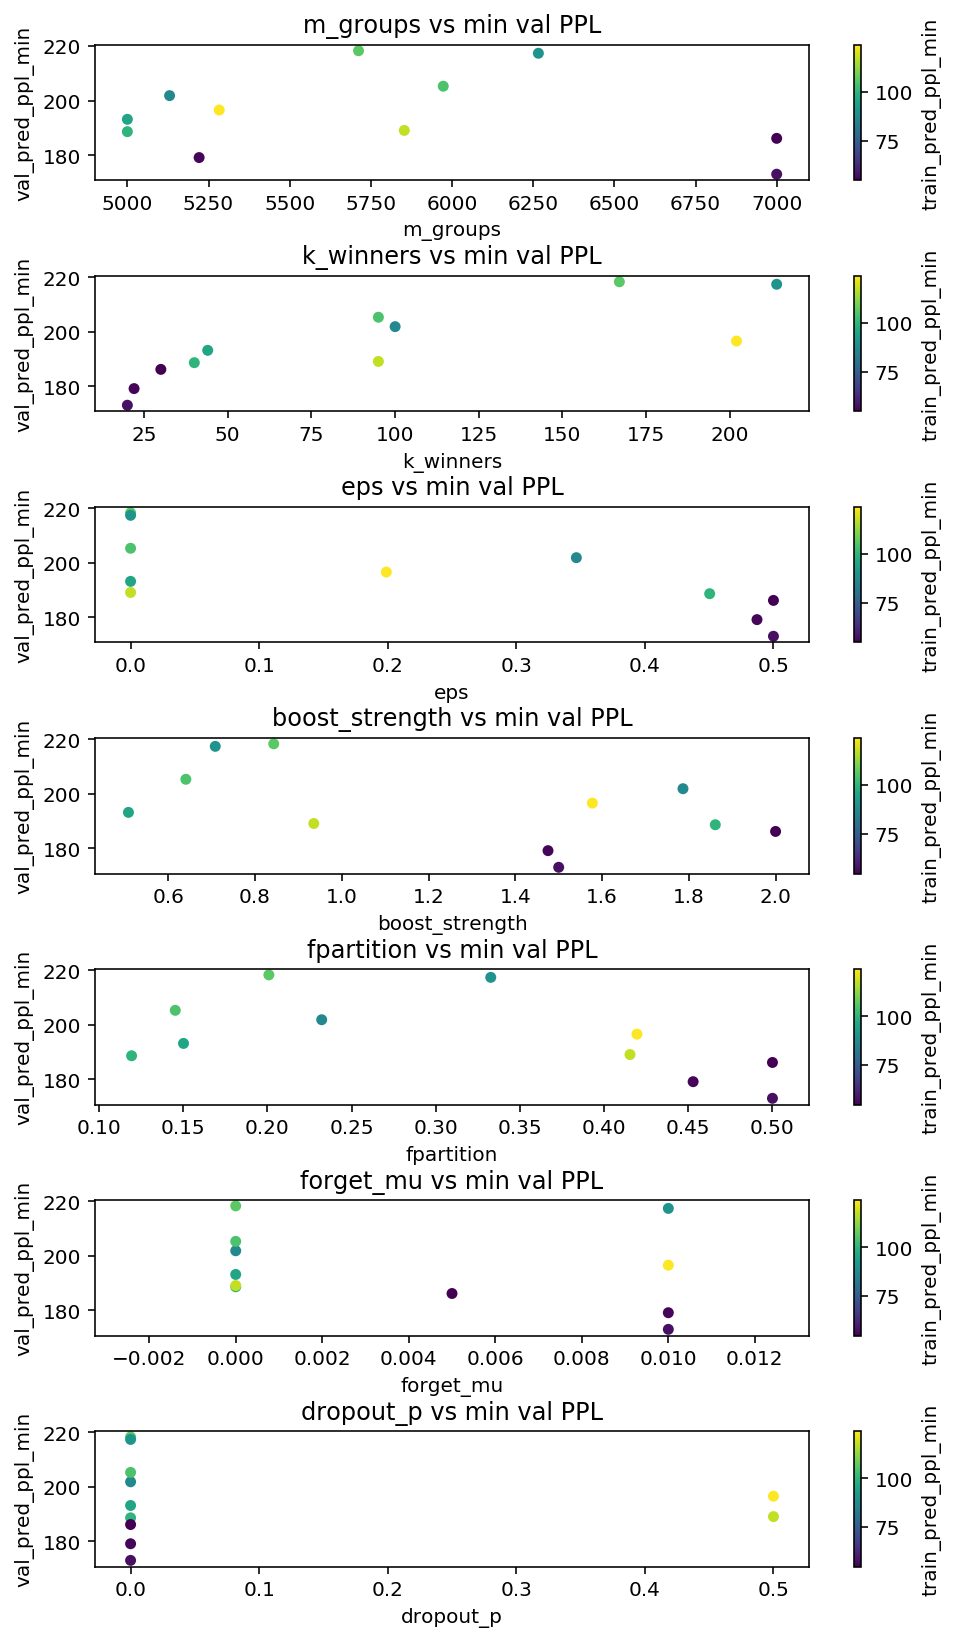

In [250]:
scatter_all_tunable(df)

In [251]:
df.sort_values('val_pred_ppl_min')[TUNABLE + ['val_pred_ppl_min', 'val_pred_acc_max']]

,m_groups,k_winners,eps,boost_strength,fpartition,forget_mu,dropout_p,val_pred_ppl_min,val_pred_acc_max
22,7000,20,0.500000,1.500000,0.500000,0.010,0.0,173.047570,21.809326
18,5221,22,0.487196,1.475382,0.452876,0.010,0.0,179.147110,21.379961
21,7000,30,0.500000,2.000000,0.500000,0.005,0.0,186.189591,21.035803
4,5000,40,0.450389,1.861009,0.119279,0.000,0.0,188.646976,20.774355
11,5853,95,0.000000,0.935473,0.415371,0.000,0.5,189.098595,20.286150
3,5000,44,0.000000,0.508222,0.150132,0.000,0.0,193.173414,20.649181
17,5283,202,0.198899,1.577634,0.419500,0.010,0.5,196.575022,20.901193
9,5130,100,0.346706,1.786504,0.232219,0.000,0.0,201.854917,20.630863
15,5973,95,0.000000,0.640513,0.145230,0.000,0.0,205.302714,20.233694
13,6266,214,0.000000,0.708307,0.332655,0.010,0.0,217.384893,20.134610


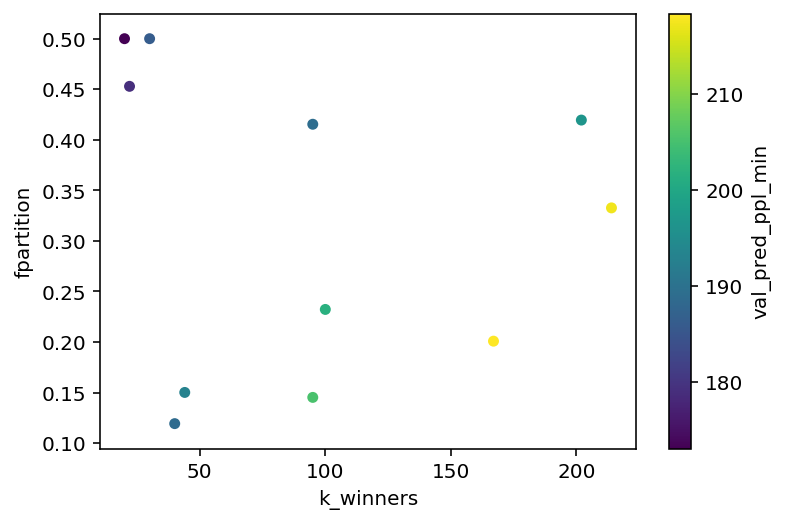

In [252]:
fig, ax = plt.subplots(dpi=144)
df[df.val_pred_ppl_min < 220].plot(kind='scatter', x='k_winners', y='fpartition', c='val_pred_ppl_min', colormap='viridis', ax=ax)
plt.show()